In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
p1 = '/content/drive/MyDrive/Colab Notebooks/CNN/Bike.csv'
df = pd.read_csv(p1)

Mounted at /content/drive


In [3]:
df.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                776527 non-null  int64 
 1   Start date            776527 non-null  object
 2   Start station number  776527 non-null  int64 
 3   Start station         776527 non-null  object
 4   End date              776527 non-null  object
 5   End station number    776527 non-null  int64 
 6   End station           776527 non-null  object
 7   Bike number           776527 non-null  int64 
 8   Bike model            776527 non-null  object
 9   Total duration        776527 non-null  object
 10  Total duration (ms)   776527 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 65.2+ MB


##Visualizations

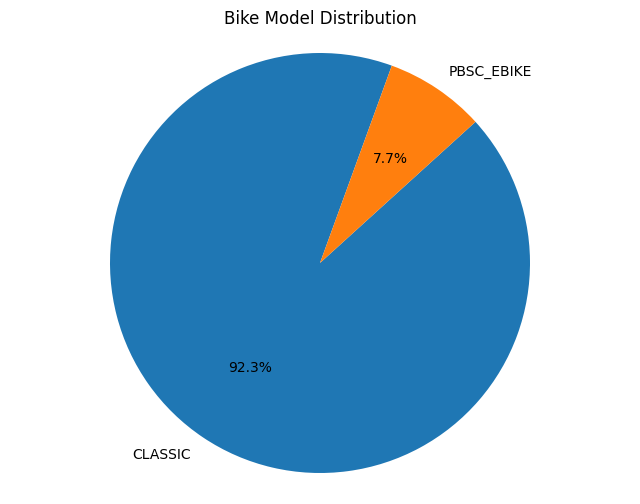

In [5]:
# Bike model distribution
bike_model_counts = df['Bike model'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(bike_model_counts, labels=bike_model_counts.index, autopct='%1.1f%%', startangle=70)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Bike Model Distribution')

# Show the plot
plt.show()

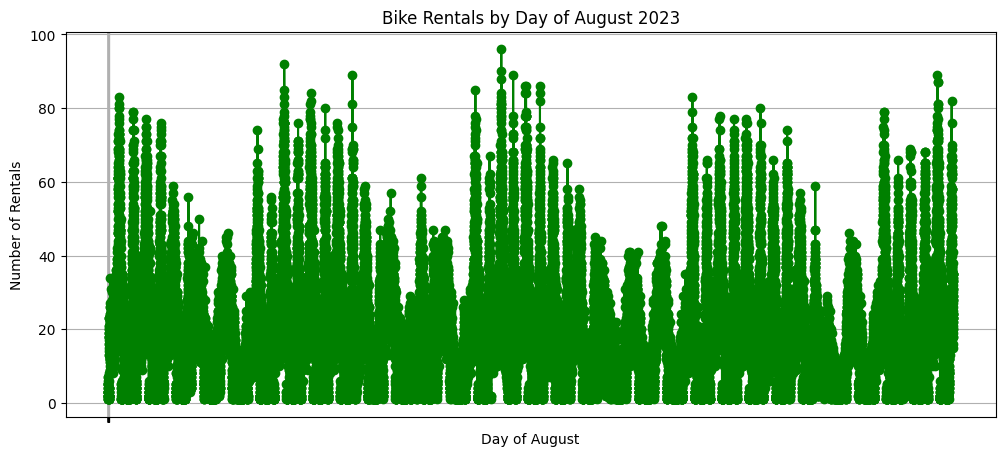

In [6]:
# Analyzing daily trends
daily_counts = df.groupby('Start date').size()
plt.figure(figsize=(12, 5))
daily_counts.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Bike Rentals by Day of August 2023')
plt.xlabel('Day of August')
plt.ylabel('Number of Rentals')
plt.xticks(range(1,32))
plt.grid(True)
plt.show()

##Classification

In [11]:
features = ['Start station number', 'End station number']
X = df[features]
y = df['Bike model']

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the random forest classifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))


Random Forest Classification Report:
              precision    recall  f1-score   support

     CLASSIC       0.93      0.98      0.95    143253
  PBSC_EBIKE       0.37      0.14      0.20     12053

    accuracy                           0.91    155306
   macro avg       0.65      0.56      0.58    155306
weighted avg       0.89      0.91      0.90    155306



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train the decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_clf.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classification Report:
              precision    recall  f1-score   support

     CLASSIC       0.93      0.98      0.95    143253
  PBSC_EBIKE       0.33      0.15      0.20     12053

    accuracy                           0.91    155306
   macro avg       0.63      0.56      0.58    155306
weighted avg       0.88      0.91      0.89    155306

